In [1]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np
torch.set_default_dtype(torch.float64)

回归问题

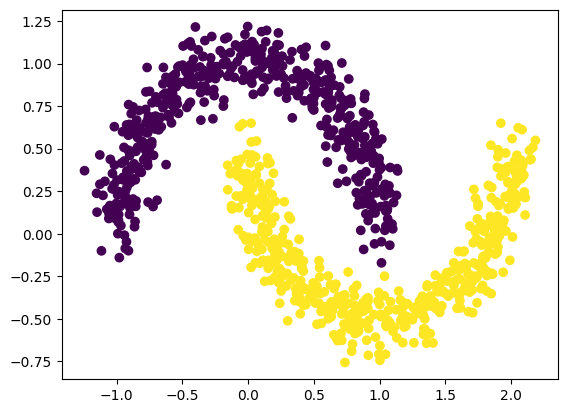

In [2]:
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label[:,None])
dataset['test_label'] = torch.from_numpy(test_label[:,None])

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.show()

In [3]:
model = KAN(width=[2,1])

In [7]:
model = KAN(width=[2,5,1])

In [4]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

train loss: 1.50e-01 | test loss: 1.62e-01 | reg: 5.43e+00 : 100%|██| 20/20 [00:01<00:00, 19.95it/s]


1.0 0.996999979019165
fixing (0,0,0) with sin, r2=0.9736790372163601
fixing (0,1,0) with tan, r2=0.9776570019776524
formula:-0.39*sin(3.1*x_1 - 1.56) - 0.83*tan(0.89*x_2 + 9.18) + 0.48
train acc of the formula: 1.0
test acc of the formula: 0.999


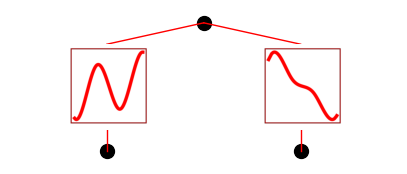

In [5]:
results = model.train(dataset=dataset, steps=20, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
model.plot()
print(f'formula:{formula}')
print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']).item())
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']).item())

train loss: 4.58e-02 | test loss: 5.05e-02 | reg: 1.27e+01 : 100%|██| 20/20 [00:03<00:00,  5.12it/s]


1.0 1.0
fixing (0,0,0) with sin, r2=0.9999970161811266
fixing (0,0,1) with sin, r2=0.9905886871527564
fixing (0,0,2) with x^3, r2=0.9740801781296146
fixing (0,0,3) with tanh, r2=0.9997512832883607
fixing (0,0,4) with sin, r2=0.9913643585565083
fixing (0,1,0) with x^3, r2=0.8844739979476723
fixing (0,1,1) with tanh, r2=0.9900351298150815
fixing (0,1,2) with sin, r2=0.9902146759139325
fixing (0,1,3) with sin, r2=0.9987504671635881
fixing (0,1,4) with tanh, r2=0.9944825287339157
fixing (1,0,0) with sin, r2=0.9961434362447599
fixing (1,1,0) with sin, r2=0.8763087056397276
fixing (1,2,0) with sin, r2=0.9917655888066917
fixing (1,3,0) with sin, r2=0.7970572993992797
fixing (1,4,0) with tanh, r2=0.9998765519443644
formula:0.4*sin(0.6*(0.23 - x_1)**3 + 2.39*sin(1.83*x_2 + 0.58) - 3.46) - 0.26*sin(-0.55*(0.37 - x_2)**3 + 4.94*sin(0.48*x_1 - 0.93) + 11.42) - 0.18*sin(2.88*sin(2.15*x_1 - 1.59) + 13.69*tanh(0.43*x_2 + 0.21) + 3.28) + 0.43*sin(0.57*sin(2.48*x_2 + 3.84) + 3.9*tanh(0.97*x_1 - 0.53) +

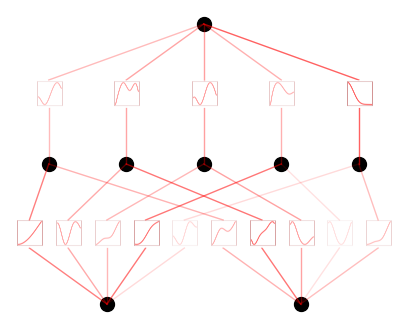

In [8]:
results = model.train(dataset=dataset, steps=20, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
model.plot()
print(f'formula:{formula}')
print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']).item())
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']).item())

分类问题

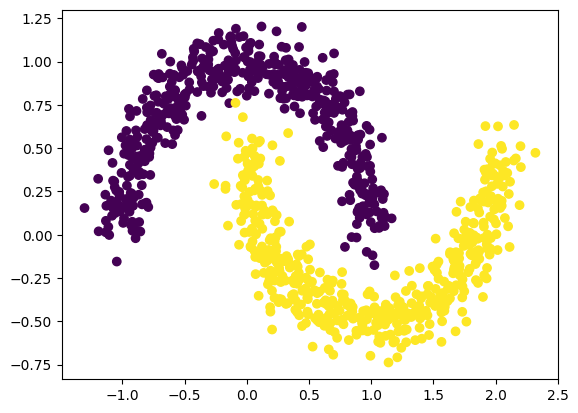

In [9]:
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])
plt.show()

In [24]:
model = KAN(width=[2,2])

In [26]:
model = KAN(width=[2,5,2])

In [19]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

def acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        correct += (logit2 > logit1) == y[i]
    return correct/batch

train loss: 0.00e+00 | test loss: 7.09e-01 | reg: 1.13e+03 : 100%|██| 20/20 [00:00<00:00, 23.99it/s]


fixing (0,0,0) with sin, r2=0.8302941146138517
fixing (0,0,1) with sin, r2=0.7800334218510213
fixing (0,1,0) with x^3, r2=0.9535837200634747
fixing (0,1,1) with x^3, r2=0.9533469618353839
formula1:-3199.59*(0.21 - x_2)**3 - 830.2*sin(3.13*x_1 + 1.42) - 123.9
formula2:3112.72*(0.21 - x_2)**3 + 934.19*sin(3.19*x_1 + 1.4) + 176.64
train acc of the formula: 0.97
test acc of the formula: 0.966


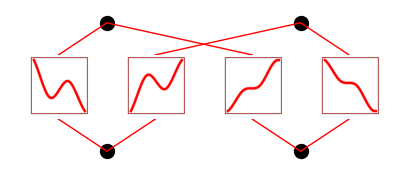

In [25]:
results = model.train(dataset=dataset, steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)
model.plot()
formula1, formula2 = model.symbolic_formula()[0]
print(f'formula1:{formula1}')
print(f'formula2:{formula2}')
print('train acc of the formula:', acc(formula1, formula2, dataset['train_input'], dataset['train_label']).item())
print('test acc of the formula:', acc(formula1, formula2, dataset['test_input'], dataset['test_label']).item())

train loss: 3.37e-08 | test loss: 3.12e-01 | reg: 2.26e+02 : 100%|██| 20/20 [00:05<00:00,  3.94it/s]


fixing (0,0,0) with tanh, r2=0.9999630668165022
fixing (0,0,1) with sin, r2=0.9148993477271947
fixing (0,0,2) with sin, r2=0.9997395427916703
fixing (0,0,3) with sin, r2=0.9998290603358014
fixing (0,0,4) with sin, r2=0.9998519111504606
fixing (0,1,0) with x^2, r2=0.9995726886601888
fixing (0,1,1) with sin, r2=0.9994035856551567
fixing (0,1,2) with sin, r2=0.9981849829774181
fixing (0,1,3) with sin, r2=0.9997866721220754
fixing (0,1,4) with sin, r2=0.9999943617343061
fixing (1,0,0) with sin, r2=0.9491637367123236
fixing (1,0,1) with sin, r2=0.9442743288711675
fixing (1,1,0) with sin, r2=0.9787937105253378
fixing (1,1,1) with sin, r2=0.9788276771981413
fixing (1,2,0) with x^4, r2=0.9881047351201064
fixing (1,2,1) with x^4, r2=0.9891289529441983
fixing (1,3,0) with x^2, r2=0.9888330451480627
fixing (1,3,1) with x^2, r2=0.9896286052330756
fixing (1,4,0) with tanh, r2=0.9737680568901707
fixing (1,4,1) with tanh, r2=0.9675034286046458
formula1:-390.52*(sin(0.75*x_1 + 1.98) + 0.54*sin(2.34*x_

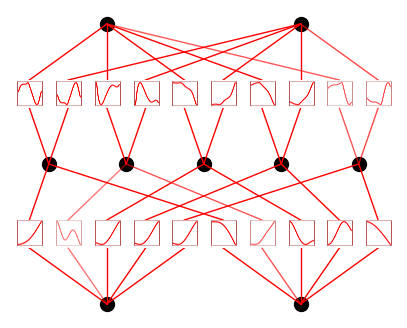

In [27]:
results = model.train(dataset=dataset, steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)
model.plot()
formula1, formula2 = model.symbolic_formula()[0]
print(f'formula1:{formula1}')
print(f'formula2:{formula2}')
print('train acc of the formula:', acc(formula1, formula2, dataset['train_input'], dataset['train_label']).item())
print('test acc of the formula:', acc(formula1, formula2, dataset['test_input'], dataset['test_label']).item())